In [105]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#IMPORTING LIBRARIES AND LOADING THE DATA SET

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
lungs=pd.read_csv("survey lung cancer.csv")
lungs.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [107]:
lungs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [108]:
lungs.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [109]:
lungs.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [110]:
lungs.isnull().sum()


GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [111]:
lungs.dropna()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


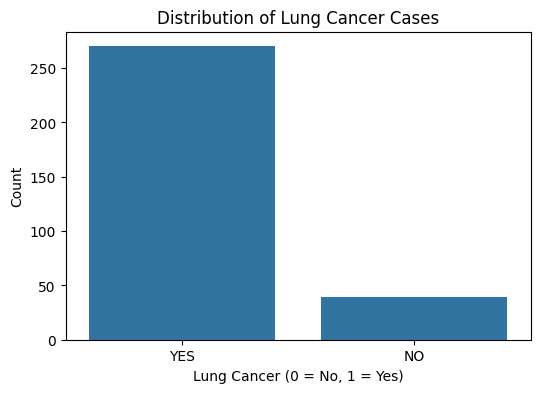

In [112]:

lungs.columns = lungs.columns.str.strip().str.replace(' ', '_')


plt.figure(figsize=(6, 4))
sns.countplot(data=lungs, x='LUNG_CANCER')
plt.title('Distribution of Lung Cancer Cases')
plt.xlabel('Lung Cancer (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


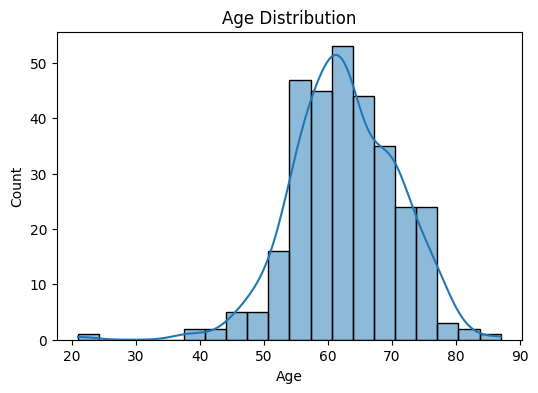

In [113]:
plt.figure(figsize=(6, 4))
sns.histplot(data=lungs, x='AGE', bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

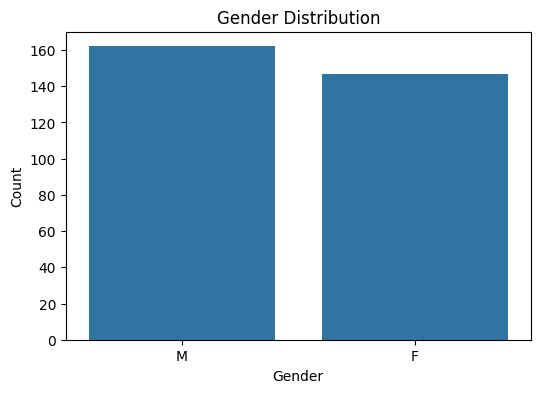

In [114]:
plt.figure(figsize=(6, 4))
sns.countplot(data=lungs, x='GENDER')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

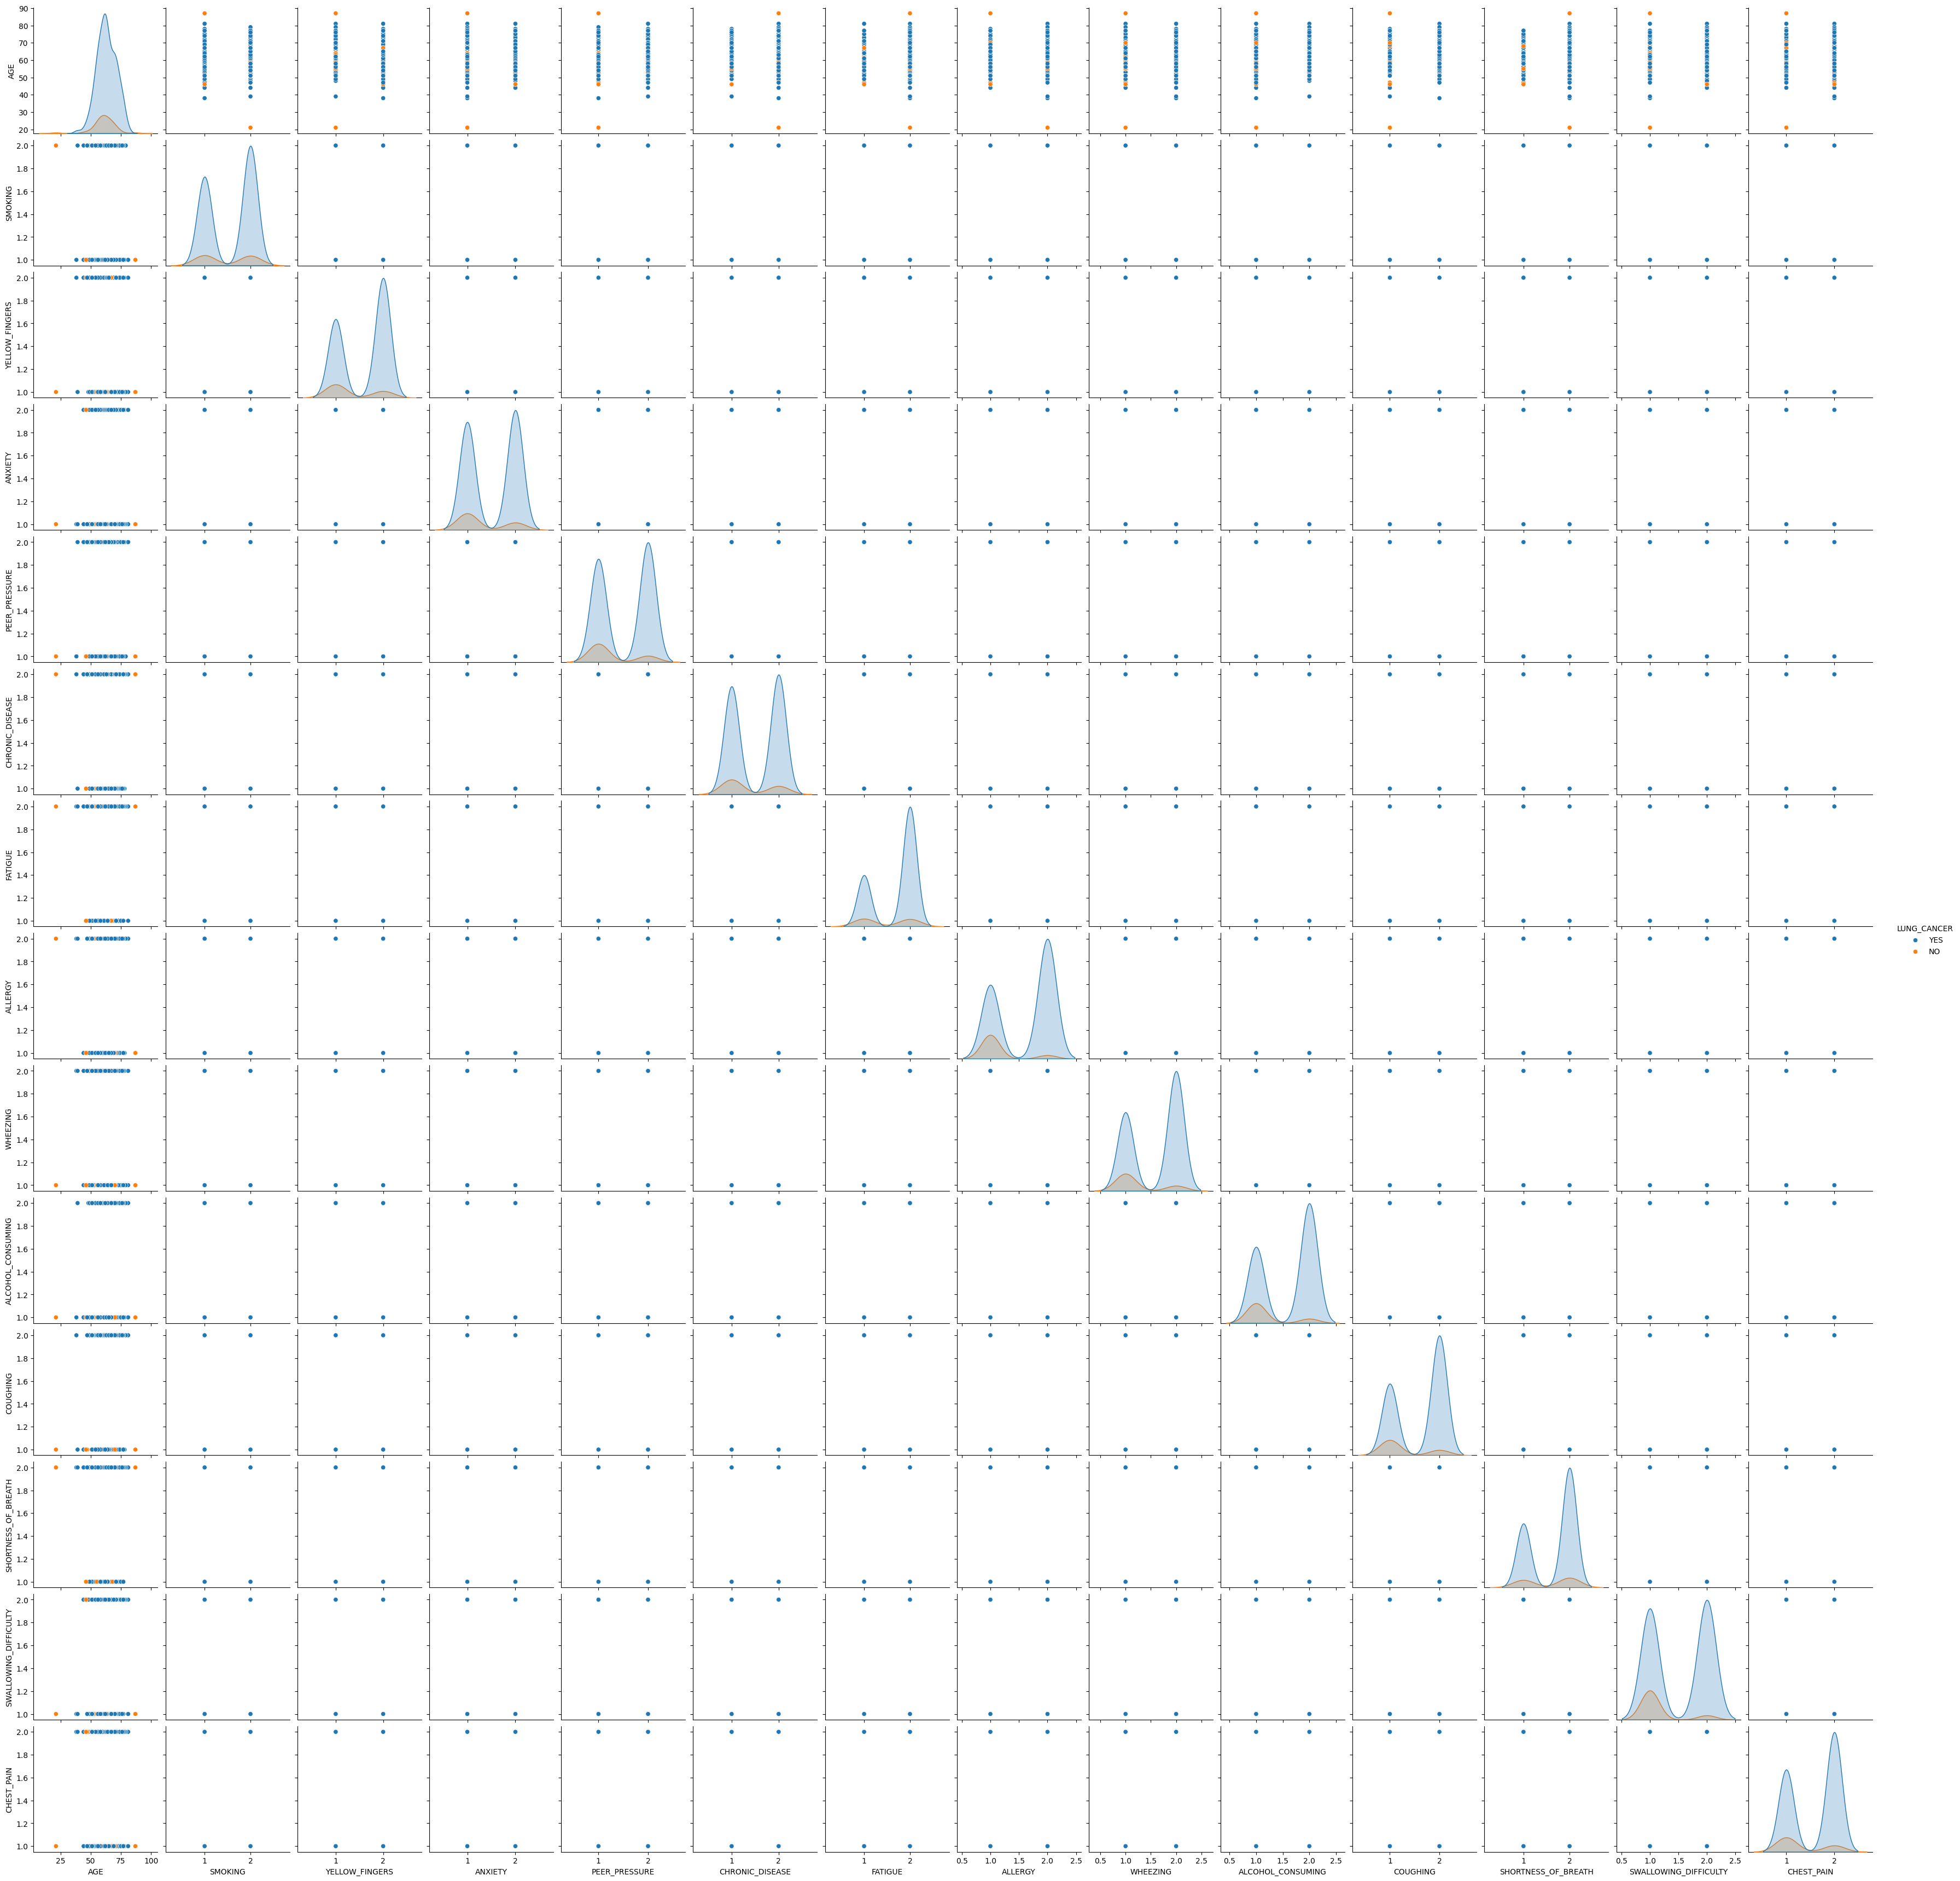

In [115]:
sns.pairplot(lungs, hue='LUNG_CANCER')
plt.show()

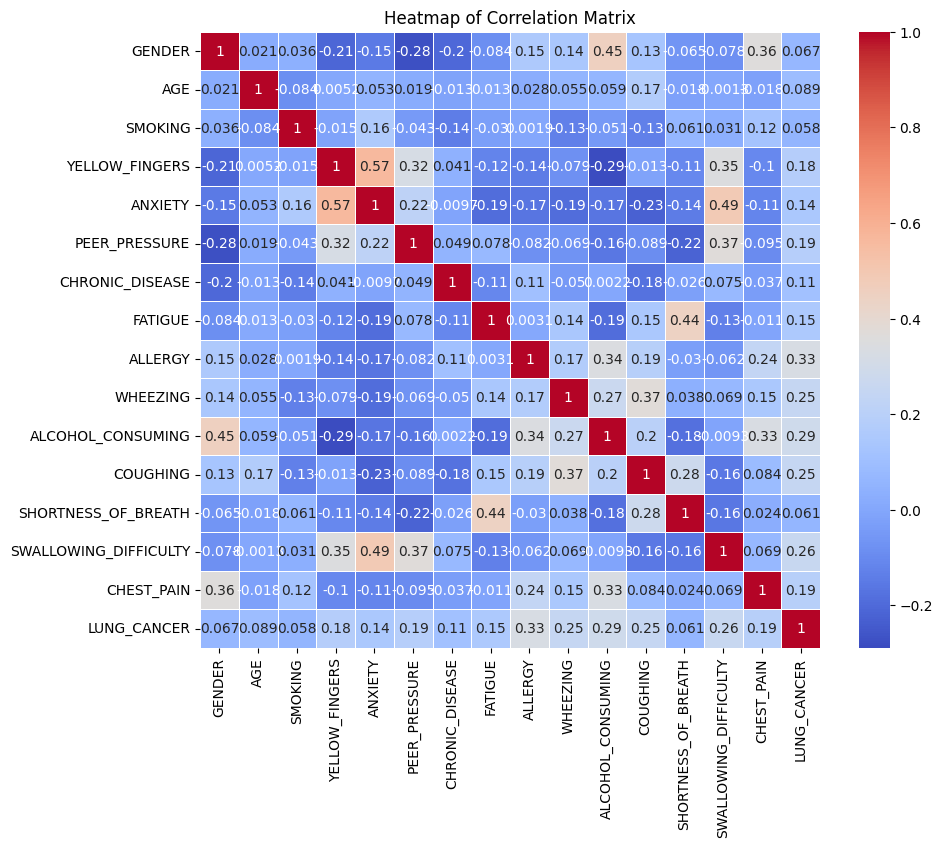

In [138]:
# Encode the 'GENDER' and 'LUNG_CANCER' columns
lungs_encoded = lungs.copy()
lungs_encoded['GENDER'] = lungs_encoded['GENDER'].map({'M': 1, 'F': 0})
lungs_encoded['LUNG_CANCER'] = lungs_encoded['LUNG_CANCER'].map({'YES': 1, 'NO': 0})

# Compute the correlation matrix
corr_matrix = lungs_encoded.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

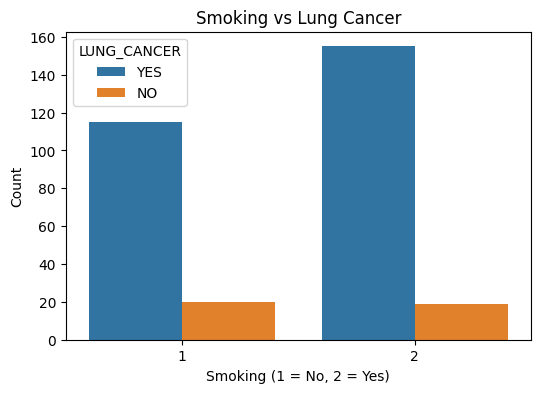

In [116]:
plt.figure(figsize=(6, 4))
sns.countplot(data=lungs, x='SMOKING', hue='LUNG_CANCER')
plt.title('Smoking vs Lung Cancer')
plt.xlabel('Smoking (1 = No, 2 = Yes)')
plt.ylabel('Count')
plt.show()

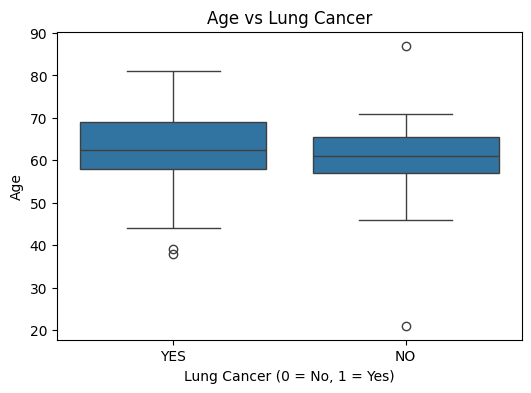

In [117]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=lungs, x='LUNG_CANCER', y='AGE')
plt.title('Age vs Lung Cancer')
plt.xlabel('Lung Cancer (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

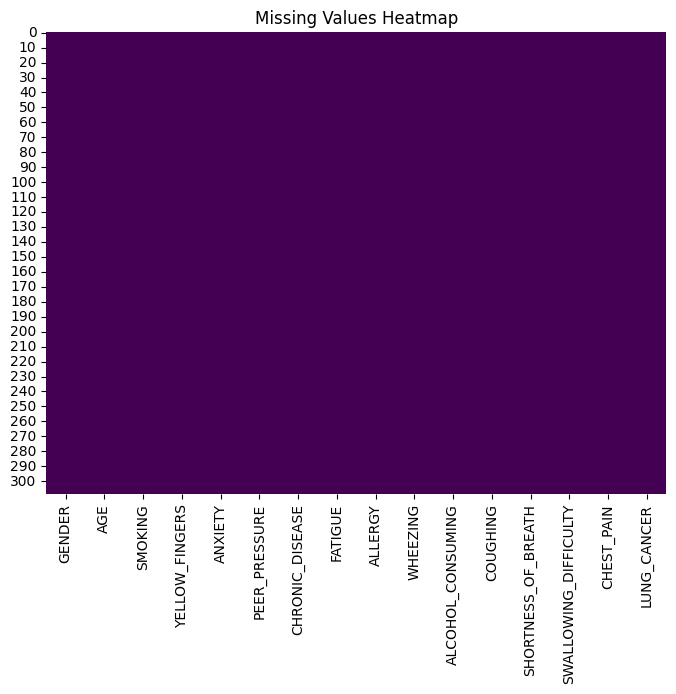

In [118]:

plt.figure(figsize=(8, 6))
sns.heatmap(lungs.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


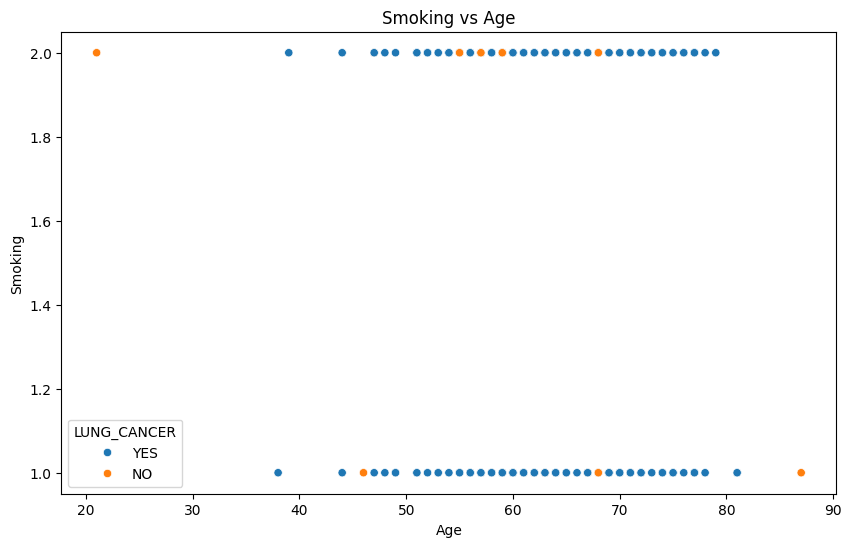

In [119]:
# Scatter Plot: Relationship between Smoking and Age
plt.figure(figsize=(10, 6))
sns.scatterplot(data=lungs, x='AGE', y='SMOKING', hue='LUNG_CANCER')
plt.title('Smoking vs Age')
plt.xlabel('Age')
plt.ylabel('Smoking')
plt.show()

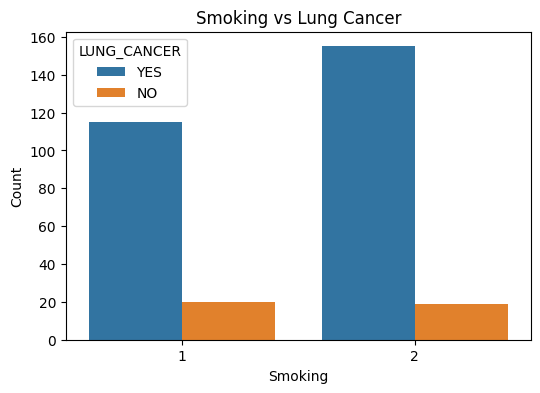

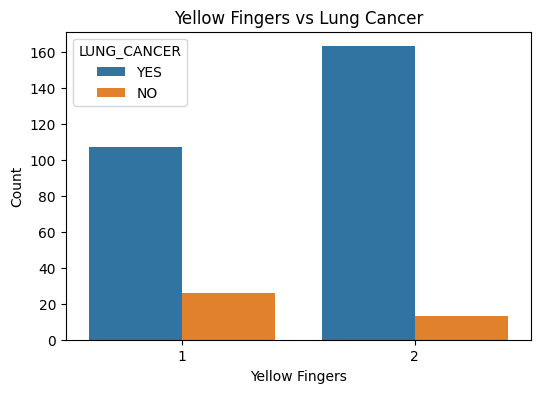

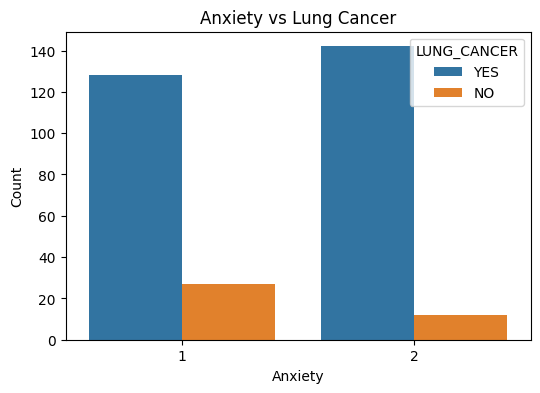

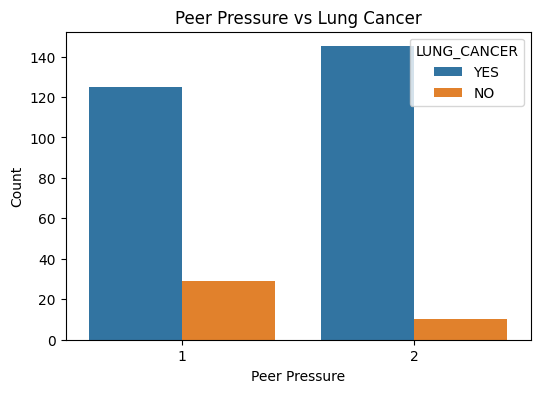

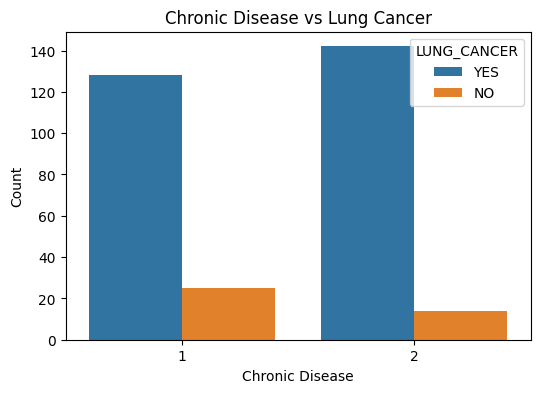

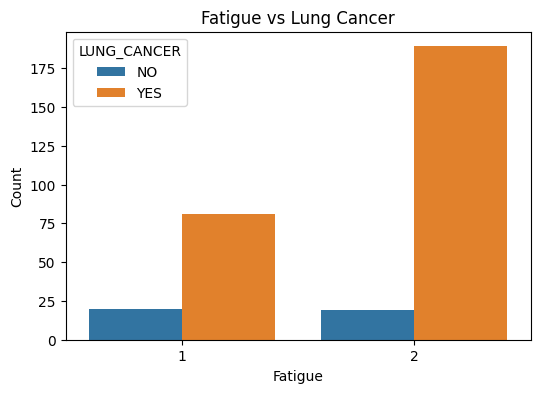

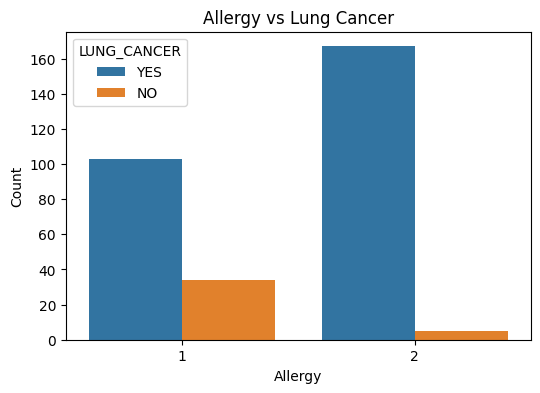

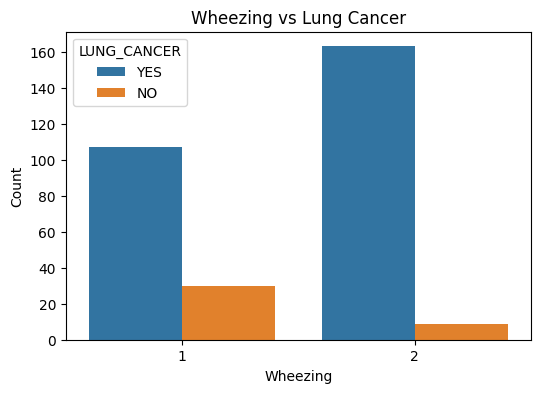

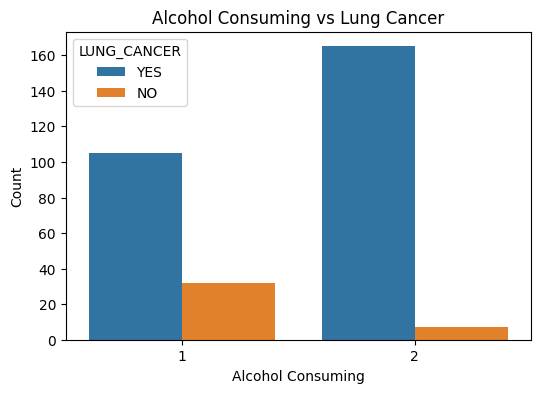

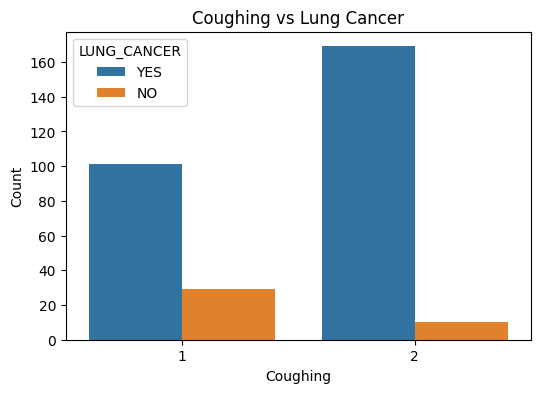

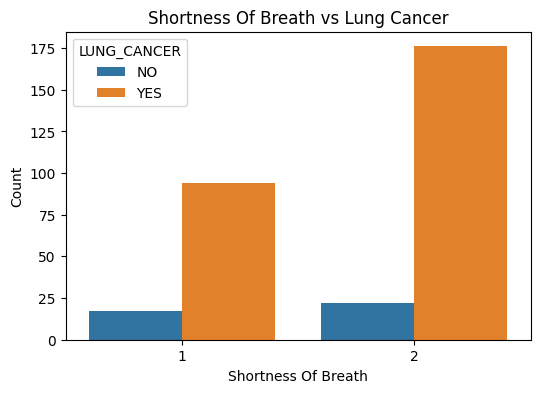

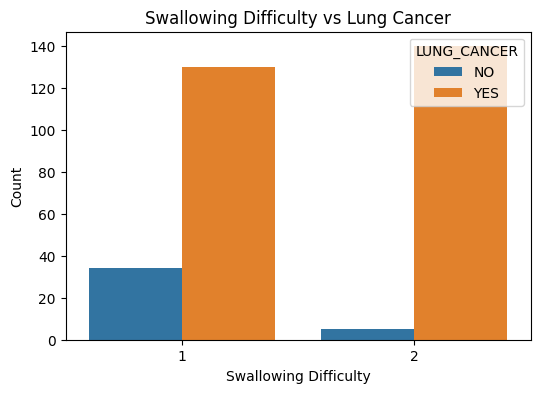

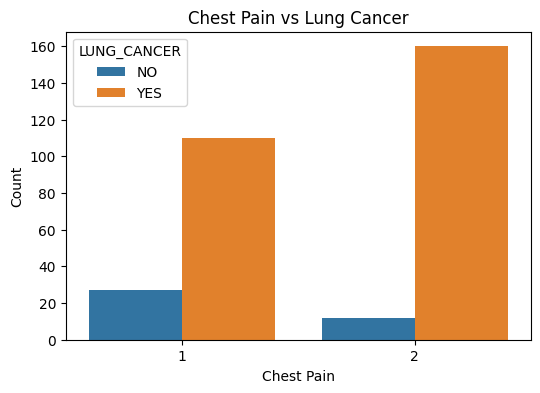

In [120]:
categorical_features = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']
for feature in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=lungs, x=feature, hue='LUNG_CANCER')
    plt.title(f'{feature.replace("_", " ").title()} vs Lung Cancer')
    plt.xlabel(feature.replace("_", " ").title())
    plt.ylabel('Count')
    plt.show()

In [121]:
# Encoding categorical variables
data_encoded = pd.get_dummies(lungs, columns=['GENDER', 'LUNG_CANCER'], drop_first=True)

print(data_encoded.columns)


Index(['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'GENDER_M', 'LUNG_CANCER_YES'],
      dtype='object')


In [122]:

print(data_encoded.head())


   AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  CHRONIC_DISEASE  \
0   69        1               2        2              1                1   
1   74        2               1        1              1                2   
2   59        1               1        1              2                1   
3   63        2               2        2              1                1   
4   63        1               2        1              1                1   

   FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  COUGHING  \
0        2        1         2                  2         2   
1        2        2         1                  1         1   
2        2        1         2                  1         2   
3        1        1         1                  2         1   
4        1        1         2                  1         2   

   SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN  GENDER_M  \
0                    2                      2           2      True   
1                    2      

In [123]:

data_encoded['LUNG_CANCER_YES'] = data_encoded['LUNG_CANCER_YES'].astype(int)


X = data_encoded.drop('LUNG_CANCER_YES', axis=1)
y = data_encoded['LUNG_CANCER_YES']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")


Features shape: (309, 15)
Target shape: (309,)


In [124]:




X = data_encoded.drop('LUNG_CANCER_YES', axis=1)
y = data_encoded['LUNG_CANCER_YES']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [125]:

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [126]:
y_pred = model.predict(X_test)

In [127]:

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))




Confusion Matrix:
[[ 1  1]
 [ 0 60]]


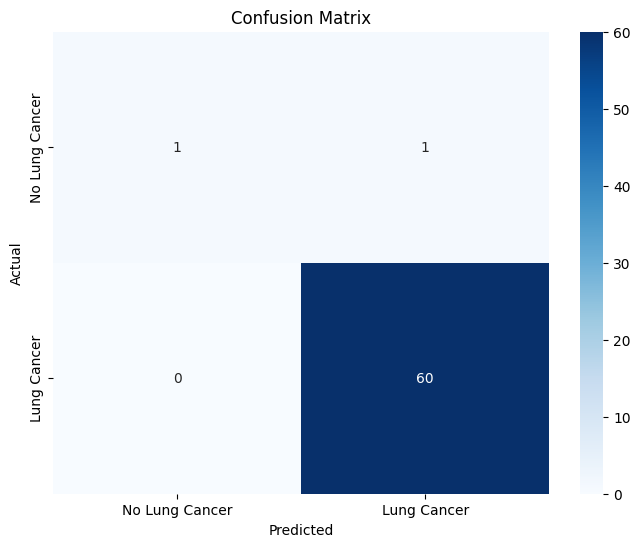

In [128]:
# Confusion Matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Lung Cancer', 'Lung Cancer'], yticklabels=['No Lung Cancer', 'Lung Cancer'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

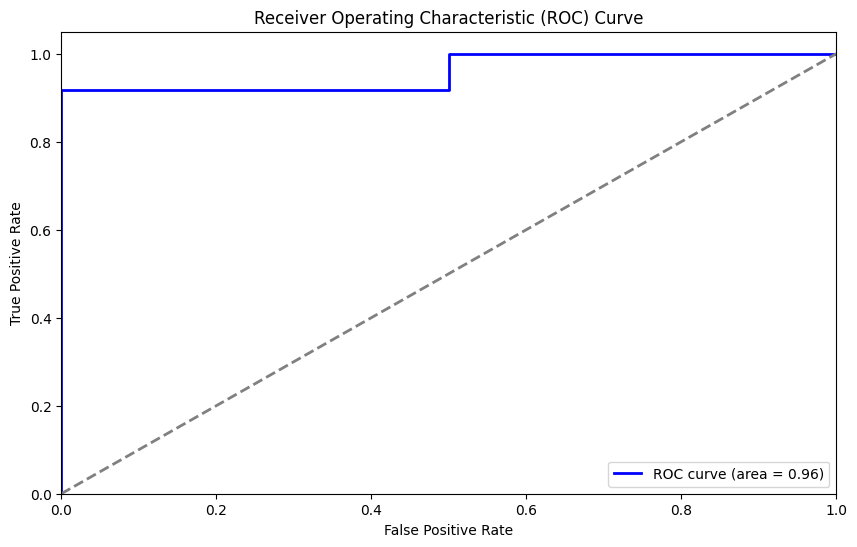

In [129]:
from sklearn.metrics import roc_curve, auc

# ROC Curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [130]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.98      1.00      0.99        60

    accuracy                           0.98        62
   macro avg       0.99      0.75      0.83        62
weighted avg       0.98      0.98      0.98        62



In [131]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.98


In [132]:
pip install gradio

In [133]:
import gradio as gr
import plotly.express as px
import pandas as pd
import base64

# Convert the image to Base64
with open("hospitals.jpg", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode()

custom_css = f"""
body {{
    font-family: Arial, sans-serif;
    background-color: #000000;
    margin: 0;
    padding: 0;
}}
gradio-container {{
    background-image: url(data:image/jpeg;base64,{encoded_string});
    background-size: cover;
    border-radius: 10px;
    box-shadow: 0 4px 10px rgba(0, 0, 0, 0.1);
    background: ;
    padding: 20px;
}}
input, select, button {{
    border: 1px solid #ccc;
    border-radius: 5px;
    padding: 10px;
    font-size: 14px;
}}
button {{
    background-color: #4CAF50;
    color: white;
    font-weight: bold;
    cursor: pointer;
}}
button:hover {{
    background-color: #45a049;
}}
"""

def predict_lung_cancer(age, smoking, yellow_fingers, anxiety, peer_pressure, chronic_disease, fatigue, allergy, wheezing, alcohol_consuming, coughing, shortness_of_breath, swallowing_difficulty, chest_pain, gender):
    input_data = pd.DataFrame({
        'AGE': [age],
        'SMOKING': [smoking],
        'YELLOW_FINGERS': [yellow_fingers],
        'ANXIETY': [anxiety],
        'PEER_PRESSURE': [peer_pressure],
        'CHRONIC_DISEASE': [chronic_disease],
        'FATIGUE': [fatigue],
        'ALLERGY': [allergy],
        'WHEEZING': [wheezing],
        'ALCOHOL_CONSUMING': [alcohol_consuming],
        'COUGHING': [coughing],
        'SHORTNESS_OF_BREATH': [shortness_of_breath],
        'SWALLOWING_DIFFICULTY': [swallowing_difficulty],
        'CHEST_PAIN': [chest_pain],
        'GENDER_M': [1 if gender == "Male" else 0]  # Gender encoding
    })
    
    input_data = scaler.transform(input_data)
    
    prediction = model.predict(input_data)[0]
    result = "Lung Cancer Detected" if prediction == 1 else "No Lung Cancer Detected"

    # Create a bar plot for visualization
    data = {
        'Feature': ['Age', 'Smoking', 'Yellow Fingers', 'Anxiety', 'Peer Pressure', 'Chronic Disease', 'Fatigue', 'Allergy', 'Wheezing', 'Alcohol Consuming', 'Coughing', 'Shortness of Breath', 'Swallowing Difficulty', 'Chest Pain', 'Gender'],
        'Value': [age, smoking, yellow_fingers, anxiety, peer_pressure, chronic_disease, fatigue, allergy, wheezing, alcohol_consuming, coughing, shortness_of_breath, swallowing_difficulty, chest_pain, gender]
    }
    df = pd.DataFrame(data)
    fig = px.bar(df, x='Feature', y='Value', title='Input Features')
    fig.update_layout(xaxis_title='Feature', yaxis_title='Value')

    # Assuming you have feature importance data
    feature_importance = model.feature_importances_
    features = ['Age', 'Smoking', 'Yellow Fingers', 'Anxiety', 'Peer Pressure', 'Chronic Disease', 'Fatigue', 'Allergy', 'Wheezing', 'Alcohol Consuming', 'Coughing', 'Shortness of Breath', 'Swallowing Difficulty', 'Chest Pain', 'Gender']
    importance_data = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
    fig_importance = px.bar(importance_data, x='Feature', y='Importance', title='Feature Importance')
    fig_importance.update_layout(xaxis_title='Feature', yaxis_title='Importance')

    return result, fig, fig_importance

interface = gr.Interface(
    fn=predict_lung_cancer,
    inputs=[
        gr.Number(label="Age"),
        gr.Slider(minimum=1, maximum=2, step=1, label="Smoking (1 = No, 2 = Yes)"),
        gr.Slider(minimum=1, maximum=2, step=1, label="Yellow Fingers (1 = No, 2 = Yes)"),
        gr.Slider(minimum=1, maximum=2, step=1, label="Anxiety (1 = No, 2 = Yes)"),
        gr.Slider(minimum=1, maximum=2, step=1, label="Peer Pressure (1 = No, 2 = Yes)"),
        gr.Slider(minimum=1, maximum=2, step=1, label="Chronic Disease (1 = No, 2 = Yes)"),
        gr.Slider(minimum=1, maximum=2, step=1, label="Fatigue (1 = No, 2 = Yes)"),
        gr.Slider(minimum=1, maximum=2, step=1, label="Allergy (1 = No, 2 = Yes)"),
        gr.Slider(minimum=1, maximum=2, step=1, label="Wheezing (1 = No, 2 = Yes)"),
        gr.Slider(minimum=1, maximum=2, step=1, label="Alcohol Consuming (1 = No, 2 = Yes)"),
        gr.Slider(minimum=1, maximum=2, step=1, label="Coughing (1 = No, 2 = Yes)"),
        gr.Slider(minimum=1, maximum=2, step=1, label="Shortness of Breath (1 = No, 2 = Yes)"),
        gr.Slider(minimum=1, maximum=2, step=1, label="Swallowing Difficulty (1 = No, 2 = Yes)"),
        gr.Slider(minimum=1, maximum=2, step=1, label="Chest Pain (1 = No, 2 = Yes)"),
        gr.Radio(choices=["Male", "Female"], label="Gender")
    ],
    outputs=[
        gr.Textbox(label="Lung Cancer Prediction"),
        gr.Plot(label="Input Features Visualization"),
        gr.Plot(label="Feature Importance Visualization")
    ],
    title="Lung Cancer Detection",
    description="Enter the details to predict whether lung cancer is likely or not.",
    css=custom_css  # Add the custom CSS here
)

interface.launch()


* Running on local URL:  http://127.0.0.1:7884

To create a public link, set `share=True` in `launch()`.
